In [2]:
import numpy as np
import matplotlib.pyplot as plt

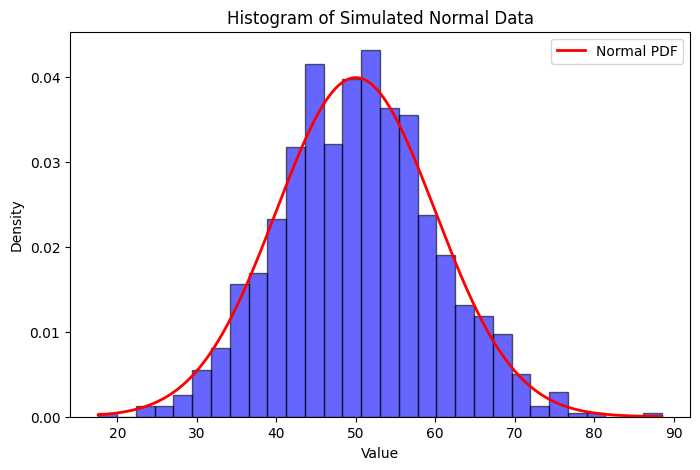

In [3]:
# μ = 50 and standard deviation σ = 10.
np.random.seed(42)  
mu, sigma = 50, 10
data = np.random.normal(mu, sigma, 1000)

plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black')

# Overlay the normal distribution curve
x = np.linspace(min(data), max(data), 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
plt.plot(x, pdf, 'r', linewidth=2, label="Normal PDF")

plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Simulated Normal Data")
plt.legend()
plt.show()


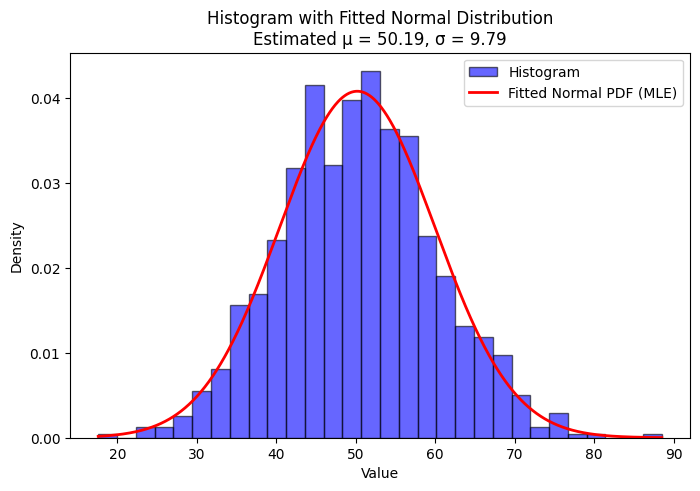

In [4]:
from scipy.stats import norm
import scipy.stats as stats

#We know below parameters to maximize the likelihood function
mu_mle = np.mean(data)  
sigma_mle = np.sqrt(np.mean((data - mu_mle) ** 2))


plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', edgecolor='black', label="Histogram")


x = np.linspace(min(data), max(data), 1000)
pdf_fitted = norm.pdf(x, mu_mle, sigma_mle) 
plt.plot(x, pdf_fitted, 'r', linewidth=2, label="Fitted Normal PDF (MLE)")

plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Histogram with Fitted Normal Distribution\nEstimated μ = {mu_mle:.2f}, σ = {sigma_mle:.2f}")
plt.legend()
plt.show()

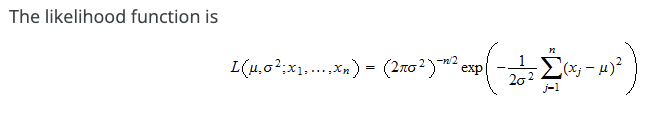
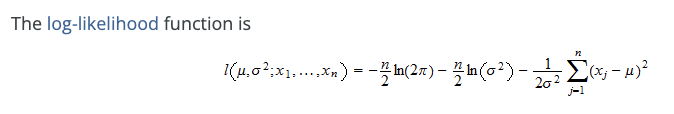
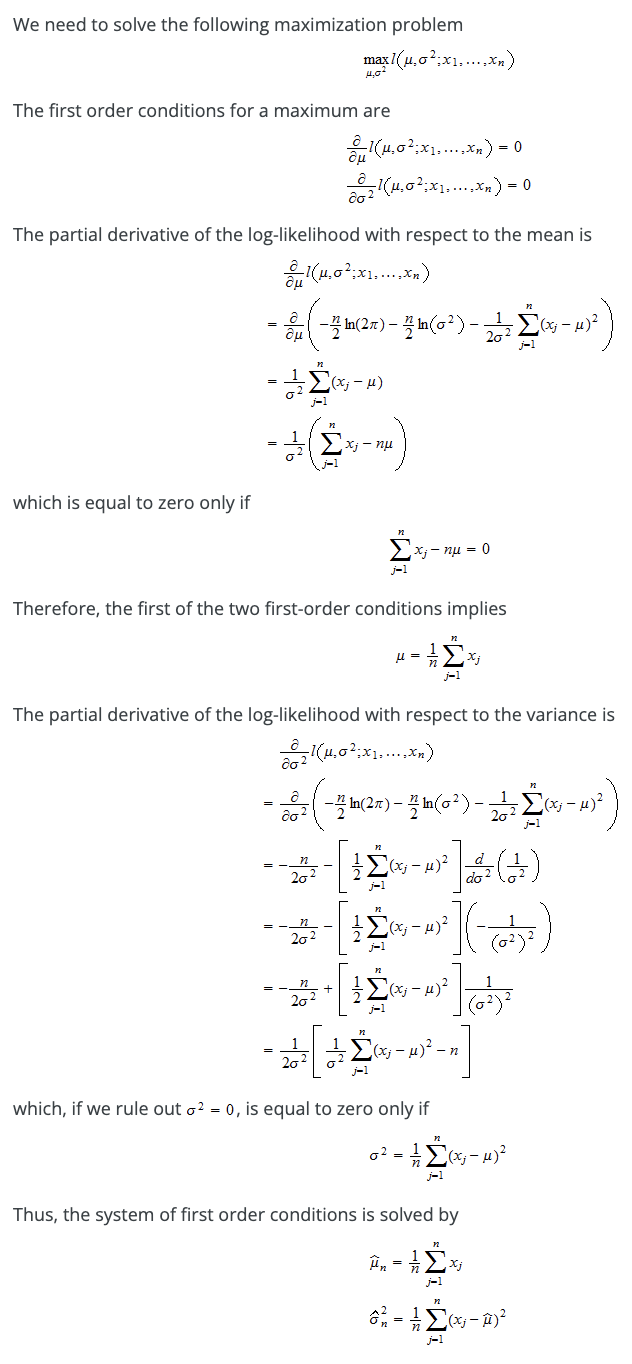

Reference: StatLect

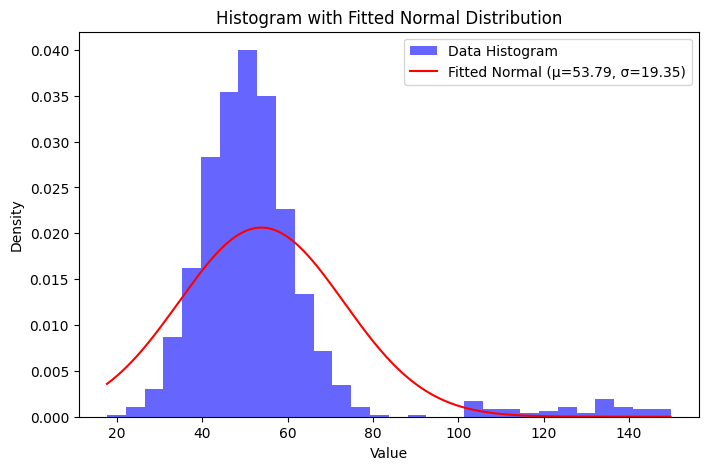

In [5]:
outliers = np.random.uniform(low=100, high=150, size=50)

new_data = np.concatenate([data, outliers])

mle_mean = np.mean(new_data)
mle_std = np.sqrt(np.mean((new_data - mu_mle) ** 2))

def plot_distribution(data, mle_mean, mle_std):
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=30, density=True, alpha=0.6, color='blue', label='Data Histogram')
    
    x = np.linspace(min(data), max(data), 1050)
    pdf = stats.norm.pdf(x, mle_mean, mle_std)
    plt.plot(x, pdf, 'r-', label=f'Fitted Normal (μ={mle_mean:.2f}, σ={mle_std:.2f})')
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.title('Histogram with Fitted Normal Distribution')
    plt.show()

plot_distribution(new_data, mle_mean, mle_std)

Impact of outliers on the estimated parameters:
* The Mean increases as the outliers skew the data towards the higher values. This increases the expected mean.
* The Standard Deviation increases as the outliers increase the spread of the data. This leads to an overestimated standard deviation.
* The normal distribtion is no longer a good fit for the data because of the heavy tailed nature that happened because of the outliers.

How to detect outliers in our data:
* Z score method: The Z-score measures how many standard deviations a data point is from the mean. A good estimate is that if the Z-score is greater than 3, then the data point is an outlier.
*  Interquartile Range (IQR): The IQR is the range between the first and third quartiles. IQR = Q3 - Q1. We define outliers as the data values outside [Q1−1.5×IQR,Q3+1.5×IQR].

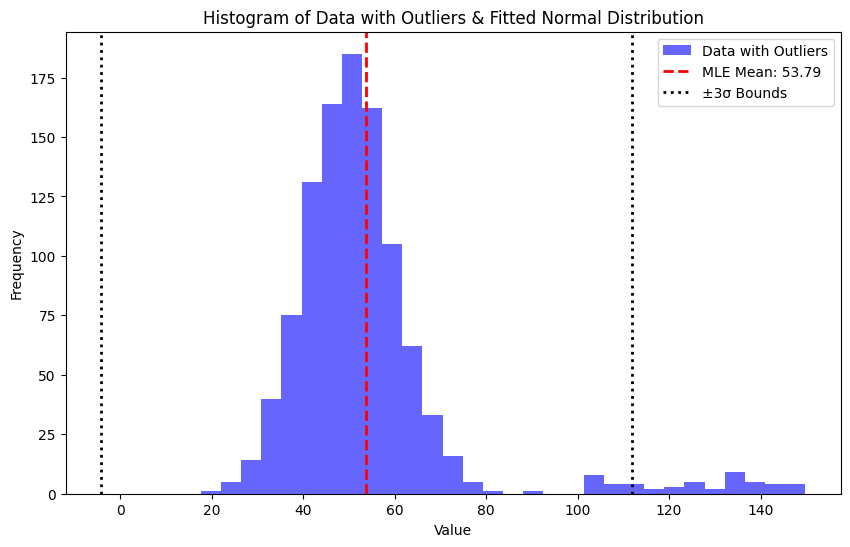

Estimated Mean with Outliers: 53.79
Estimated Std Dev with Outliers: 19.35
Number of Outliers (Z-score method): 36
Number of Outliers (IQR method): 55


In [6]:
# Method 1: Z-Score
z_scores = (new_data - mle_mean) / mle_std
outliers_z = new_data[np.abs(z_scores) > 3]  # Outliers where |Z| > 3

# Method 2: IQR
Q1 = np.percentile(new_data, 25)
Q3 = np.percentile(new_data, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = new_data[(new_data < lower_bound) | (new_data > upper_bound)]


plt.figure(figsize=(10, 6))
plt.hist(new_data, bins=30, alpha=0.6, color='blue', label="Data with Outliers")
plt.axvline(mle_mean, color='red', linestyle='dashed', linewidth=2, label=f"MLE Mean: {mle_mean:.2f}")
plt.axvline(mle_mean + 3*mle_std, color='black', linestyle='dotted', linewidth=2, label="±3σ Bounds")
plt.axvline(mle_mean - 3*mle_std, color='black', linestyle='dotted', linewidth=2)

plt.legend()
plt.title("Histogram of Data with Outliers & Fitted Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


print(f"Estimated Mean with Outliers: {mle_mean:.2f}")
print(f"Estimated Std Dev with Outliers: {mle_std:.2f}")
print(f"Number of Outliers (Z-score method): {len(outliers_z)}")
print(f"Number of Outliers (IQR method): {len(outliers_iqr)}")